# Regresión
Si los datos son continuos se trata de una regresion lineal

In [6]:
# librerias a usar
from time import time ## medir tiempo
import pandas as pd ## manipulacion de datos
import numpy as np ## operaciones con los datos

from sklearn.svm import SVR ## SVM para regresion lineal
from sklearn.metrics import r2_score ## metrica de rendimiento
from sklearn.model_selection import train_test_split ## dividir los datos en X, y

import matplotlib.pyplot as plt ## graficacion de datos

In [5]:
# creacion del df

df = pd.read_csv('datos_limpios.csv')
df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,SeniorCitizen,MonthlyCharges
0,0,1,0,0,1,0,0,29.85
1,1,0,0,1,0,0,0,56.95
2,1,0,0,1,0,0,0,53.85
3,1,0,0,0,1,0,0,42.30
4,0,0,0,1,0,1,0,70.70


In [7]:
X = df.iloc[:, 0:len(df.columns) - 1]
y = df[['MonthlyCharges']]

In [8]:
y.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [10]:
# Separamos el set de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
# Definimos nuestro algoritmo de regresion
# regresor = SVR(kernel='linear') # kernel linel
# regresor = SVR(kernel='poly') # kernel polynomial
regresor = SVR(kernel='rbf') # kernel radial


# hora inicio del entrenamiento
hora_inicio = time()

# Entrenamiento del algoritmo
regresor.fit(X_train.values, y_train.values.ravel())

# mostrar tiempo de entrenamiento
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 3.8253519535064697


In [27]:
# serie de predicciones con los datos de prueba
y_pred = regresor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


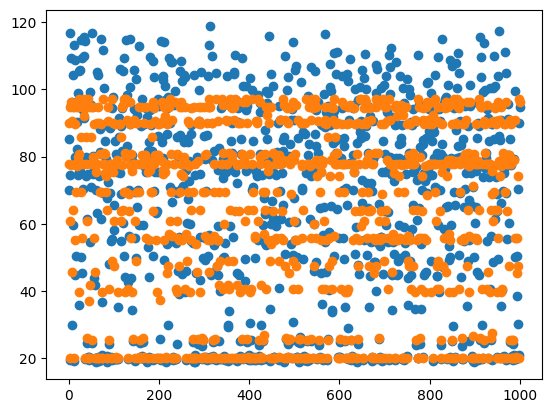

In [28]:
cantidad_probar = 1000
X_axis = np.arange(cantidad_probar)

ifg, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:cantidad_probar].values)
ax.scatter(X_axis, y_pred[0:cantidad_probar])
plt.show()

In [29]:
# error de r al cuadradro
r2_score(y_test, y_pred) # entre mas cerca a 1 este, es mucho mas efectivo

0.8806373239890382